In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
print("✓ Libraries imported!")

✓ Libraries imported!


In [2]:
df = pd.read_csv('data/cleaned_data.csv')
print(f"Dataset: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset: 7043 rows, 20 columns


In [3]:
print("=" * 60)
print("TARGET VARIABLE ANALYSIS - CHURN")
print("=" * 60)

churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print(f"\nChurn Distribution:")
print(f"No: {churn_counts['No']} ({churn_percent['No']:.2f}%)")
print(f"Yes: {churn_counts['Yes']} ({churn_percent['Yes']:.2f}%)")

TARGET VARIABLE ANALYSIS - CHURN

Churn Distribution:
No: 5174 (73.46%)
Yes: 1869 (26.54%)


✓ Churn distribution plot saved


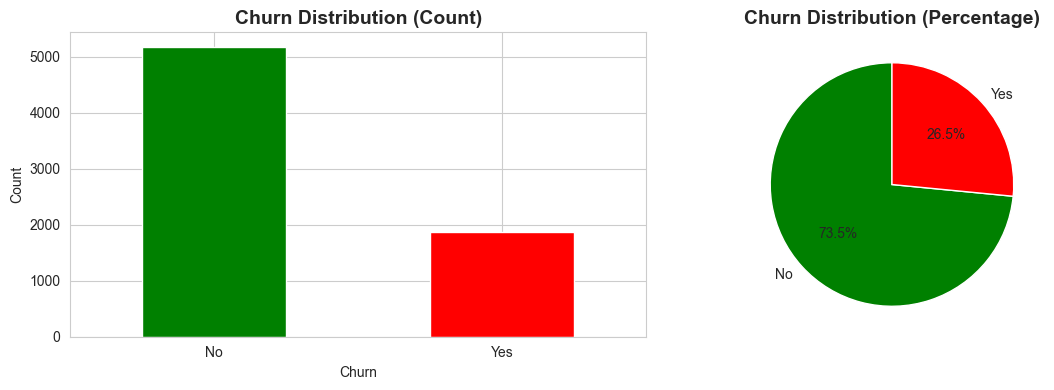

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
churn_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Pie chart
axes[1].pie(churn_counts, labels=['No', 'Yes'], autopct='%1.1f%%', 
            colors=['green', 'red'], startangle=90)
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('data/churn_distribution.png')
print("✓ Churn distribution plot saved")
plt.show()

In [5]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("\n" + "=" * 60)
print("NUMERICAL FEATURES STATISTICS")
print("=" * 60)
print(df[numerical_cols].describe())


NUMERICAL FEATURES STATISTICS
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


✓ Numerical distribution plots saved


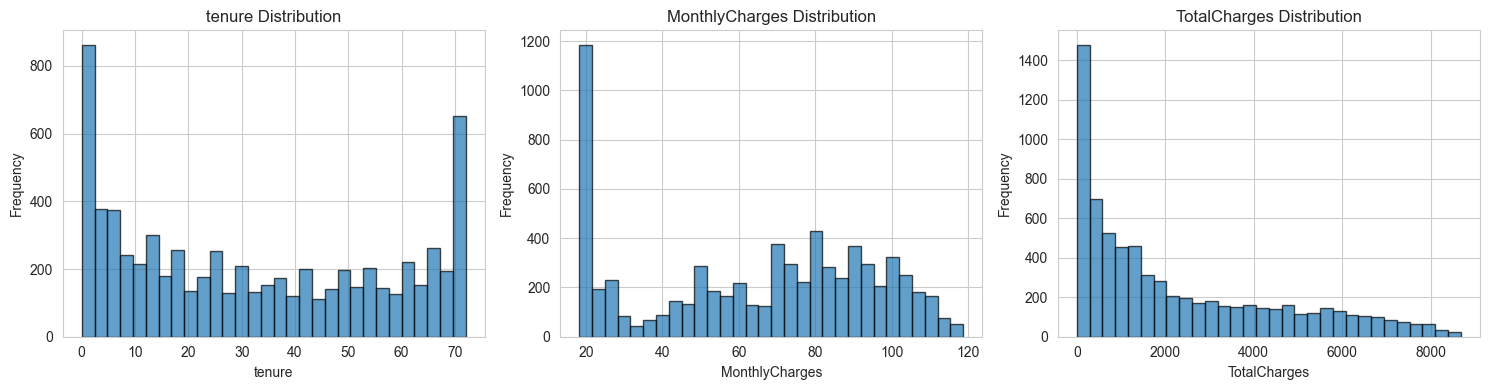

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('data/numerical_distribution.png')
print("✓ Numerical distribution plots saved")
plt.show()

✓ Numerical vs Churn plots saved


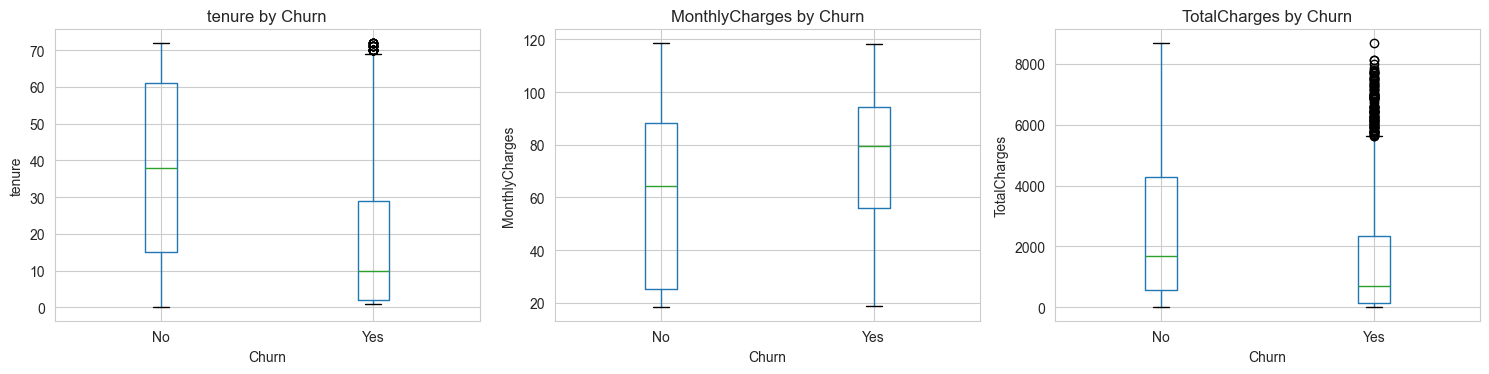

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, by='Churn', ax=axes[i])
    axes[i].set_title(f'{col} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)
    
plt.suptitle('')
plt.tight_layout()
plt.savefig('data/numerical_vs_churn.png')
print("✓ Numerical vs Churn plots saved")
plt.show()


In [8]:
print("\n" + "=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

# Convert Churn to numeric for correlation
df_corr = df.copy()
df_corr['Churn_Numeric'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

correlation = df_corr[numerical_cols + ['Churn_Numeric']].corr()
print(correlation)


CORRELATION ANALYSIS
                  tenure  MonthlyCharges  TotalCharges  Churn_Numeric
tenure          1.000000        0.247900      0.826178      -0.352229
MonthlyCharges  0.247900        1.000000      0.651174       0.193356
TotalCharges    0.826178        0.651174      1.000000      -0.198324
Churn_Numeric  -0.352229        0.193356     -0.198324       1.000000


✓ Correlation heatmap saved


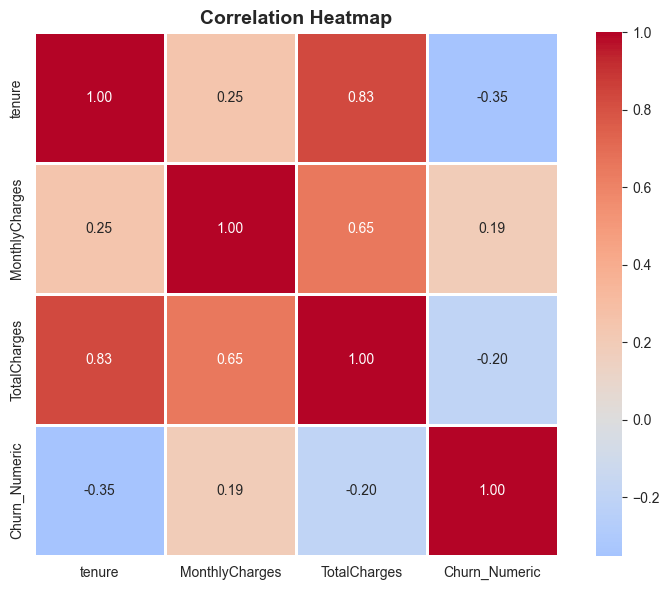

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('data/correlation_heatmap.png')
print("✓ Correlation heatmap saved")
plt.show()

In [10]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

print("\n" + "=" * 60)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

for col in categorical_cols[:5]:  # First 5 for example
    print(f"\n{col}:")
    print(df[col].value_counts())



CATEGORICAL FEATURES ANALYSIS

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


✓ Categorical vs Churn plots saved


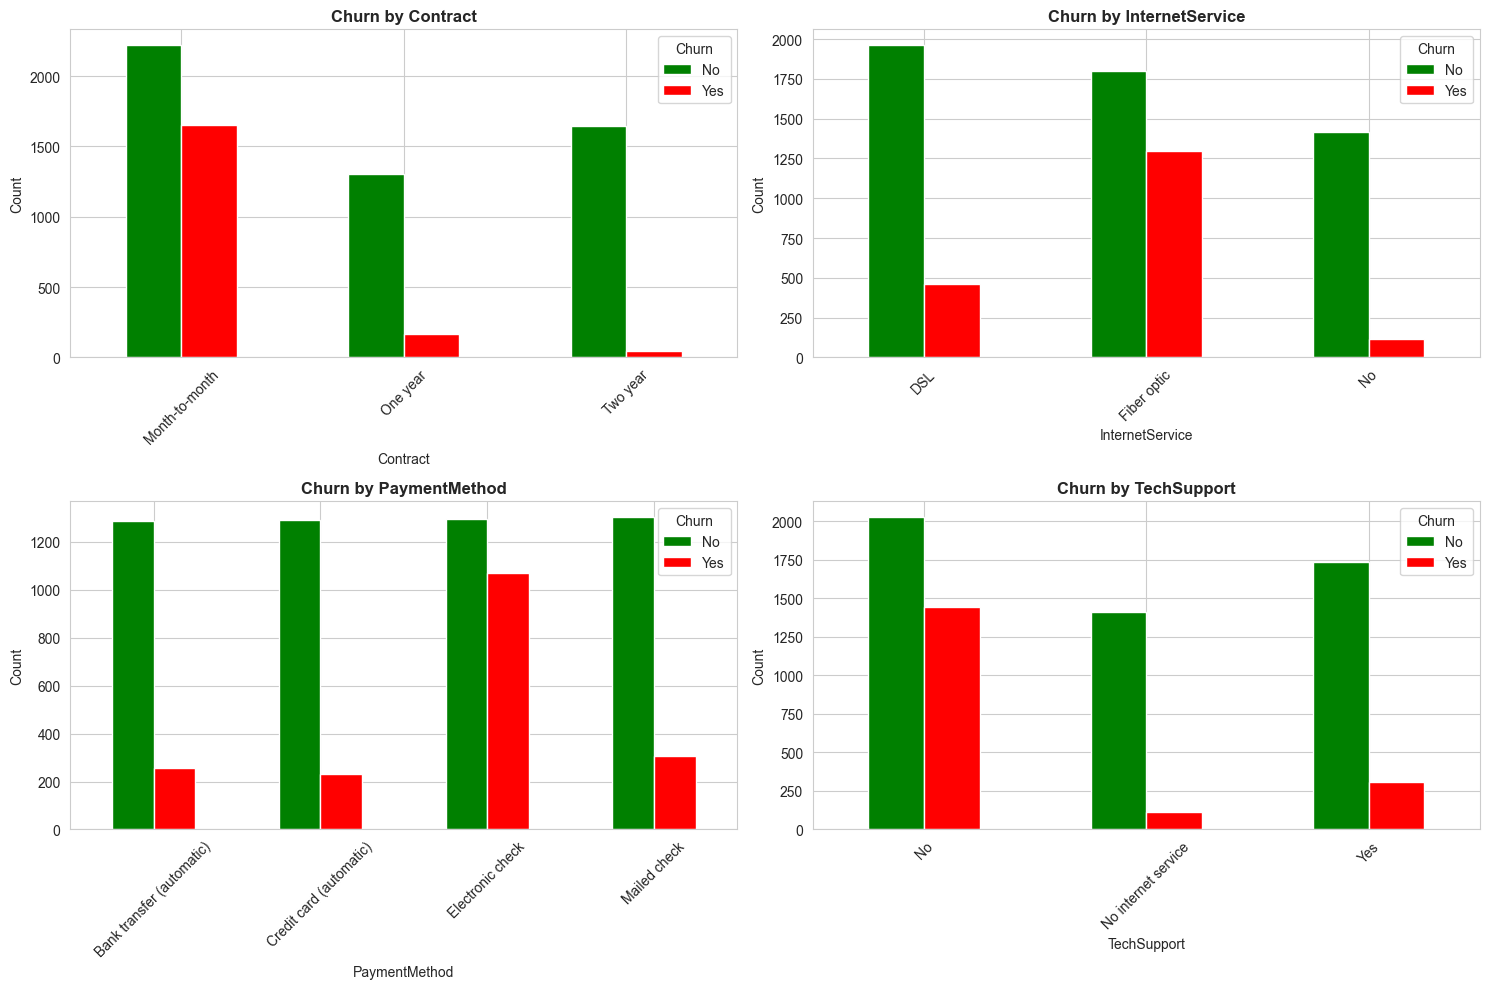

In [11]:
top_features = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(top_features):
    churn_data = df.groupby([col, 'Churn']).size().unstack()
    churn_data.plot(kind='bar', ax=axes[i], color=['green', 'red'])
    axes[i].set_title(f'Churn by {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn', labels=['No', 'Yes'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('data/categorical_vs_churn.png')
print("✓ Categorical vs Churn plots saved")
plt.show()

In [12]:
print("\n" + "=" * 60)
print("CHURN RATE BY CATEGORIES")
print("=" * 60)

for col in top_features:
    print(f"\n{col}:")
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    print(churn_rate.sort_values(ascending=False))


CHURN RATE BY CATEGORIES

Contract:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64

InternetService:
InternetService
Fiber optic    41.892765
DSL            18.959108
No              7.404980
Name: Churn, dtype: float64

PaymentMethod:
PaymentMethod
Electronic check             45.285412
Mailed check                 19.106700
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Name: Churn, dtype: float64

TechSupport:
TechSupport
No                     41.635474
Yes                    15.166341
No internet service     7.404980
Name: Churn, dtype: float64


In [13]:
print("\n" + "=" * 60)
print("KEY INSIGHTS FROM EDA")
print("=" * 60)

insights = """
1. CHURN RATE: 26.5% customers are churning

2. TENURE:
   - Customers with low tenure (<12 months) have higher churn
   - Long-term customers are more loyal

3. MONTHLY CHARGES:
   - Customers with high monthly charges (>$70) tend to churn more
   - Average: $64.76

4. CONTRACT TYPE:
   - Month-to-month: ~43% churn rate (HIGH RISK!)
   - One year: ~11% churn rate
   - Two year: ~3% churn rate (MOST LOYAL)

5. INTERNET SERVICE:
   - Fiber optic users: Higher churn (41%)
   - DSL users: Lower churn (19%)
   - No internet: Lowest churn (7%)

6. TECH SUPPORT:
   - No tech support: 42% churn
   - With tech support: 15% churn

7. PAYMENT METHOD:
   - Electronic check: 45% churn (HIGHEST RISK!)
   - Other methods: 15-18% churn

8. SENIOR CITIZENS:
   - Senior citizens: 41% churn rate
   - Non-seniors: 24% churn rate
"""

print(insights)


KEY INSIGHTS FROM EDA

1. CHURN RATE: 26.5% customers are churning

2. TENURE:
   - Customers with low tenure (<12 months) have higher churn
   - Long-term customers are more loyal

3. MONTHLY CHARGES:
   - Customers with high monthly charges (>$70) tend to churn more
   - Average: $64.76

4. CONTRACT TYPE:
   - Month-to-month: ~43% churn rate (HIGH RISK!)
   - One year: ~11% churn rate
   - Two year: ~3% churn rate (MOST LOYAL)

5. INTERNET SERVICE:
   - Fiber optic users: Higher churn (41%)
   - DSL users: Lower churn (19%)
   - No internet: Lowest churn (7%)

6. TECH SUPPORT:
   - No tech support: 42% churn
   - With tech support: 15% churn

7. PAYMENT METHOD:
   - Electronic check: 45% churn (HIGHEST RISK!)
   - Other methods: 15-18% churn

8. SENIOR CITIZENS:
   - Senior citizens: 41% churn rate
   - Non-seniors: 24% churn rate



In [14]:
with open('data/eda_insights.txt', 'w') as f:
    f.write(insights)
    
print("✓ Insights saved to 'data/eda_insights.txt'")

✓ Insights saved to 'data/eda_insights.txt'
